In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Loan_ Project2/Data/sba_national_cleaned.csv')

In [ ]:
df["franch"] = df["franch"].map({1: 0})
df = df.fillna({"franch": 1})

In [ ]:
df["date_appv"] = pd.to_datetime(df["date_appv"])
df["date_dflt"] = pd.to_datetime(df["date_dflt"])
df["date_disb"] = pd.to_datetime(df["date_disb"])

df['amt_disb'] = df['amt_disb'].divide(100)

df['term'] = df['term'].div(12).round(0)

df['naics'] = df['naics'].astype(str)
df['naics'] = df['naics'].apply(lambda x: x[:2])
df['naics'] = df['naics'].astype(int)
df['date_appv_day'] = df['date_appv'].dt.day

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit it on state column
le.fit(df['state'])
df['state_num'] = le.transform(df['state'])

In [ ]:
naicsdict = [
{'naics': 11,'industry': 'Agriculture, forestry, fishing, hunting'},
{'naics':21,'industry':'Mining, quarrying, oil, gas extraction'},
{'naics':22,'industry': 'Utilities'},
{'naics':23,'industry': 'Construction'},
{'naics':31,'industry': 'Manufacturing'},
{'naics':32,'industry': 'Manufacturing'},
{'naics':33,'industry':'Manufacturing'},
{'naics':42,'industry': 'Wholesale trade'},
{'naics':44,'industry': 'Retail trade'},
{'naics':45,'industry': 'Retail trade'},
{'naics':48,'industry':'Transportation, warehousing'},
{'naics':49,'industry':'Transportation, warehousing'},
{'naics':51,'industry': 'Information'},
{'naics':52,'industry': 'Finance and insurance'},
{'naics':53,'industry': 'Real estate and rental and leasing'},
{'naics':54,'industry': 'Professional, scientific, and technical services'},
{'naics':55,'industry': 'Management of companies and enterprises'},
{'naics':56,'industry': 'Administrative,support,waste management,remediation services'},
{'naics':61,'industry': 'Educational services'},
{'naics':62,'industry': 'Health care,social assistance'},
{'naics':71,'industry': 'Arts, entertainment,recreation'},
{'naics':72,'industry': 'Accommodation,food services'},
{'naics':81,'industry': 'Other services'},
{'naics':92,'industry': 'Public administration'}]


In [ ]:
df_naics = pd.DataFrame.from_records(naicsdict)
df_naics = pd.DataFrame.from_dict(naicsdict, orient='columns')

# Convert a list of dictionaries using json_normalize().
df_naics = pd.json_normalize(naicsdict)

In [ ]:
df = df.merge(df_naics, on='naics')
df.head(2)

,Unnamed: 0,loan_id,name,city,state,zip,bank,bank_state,naics,date_appv,appv_fy,term,num_emp,is_new,num_jobs,num_retain,franch,urban_type,is_revl,is_ldoc,date_dflt,date_disb,amt_disb,amt_outst,mis,amt_chg_off,amt_gr_appv,amt_sba,date_appv_day,state_num,industry
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997-02-28,1997,7.0,4,True,0,0,0.0,-1,0,True,NaT,1999-02-28,60000.0,0,True,0,6000000,4800000,28,15,Retail trade
1,25,1000474001,DEE'S CORNER BAIT & TACKLE,SAINT PETER,MN,56082,WELLS FARGO BANK NATL ASSOC,MN,45,1997-02-28,1997,5.0,2,False,0,0,0.0,-1,0,False,NaT,1997-04-30,39500.0,0,True,0,3950000,2962500,28,23,Retail trade


In [ ]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_formatsns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [ ]:
plt.rcParams.update({'font.size': 24})
master_figsize = (24, 16)

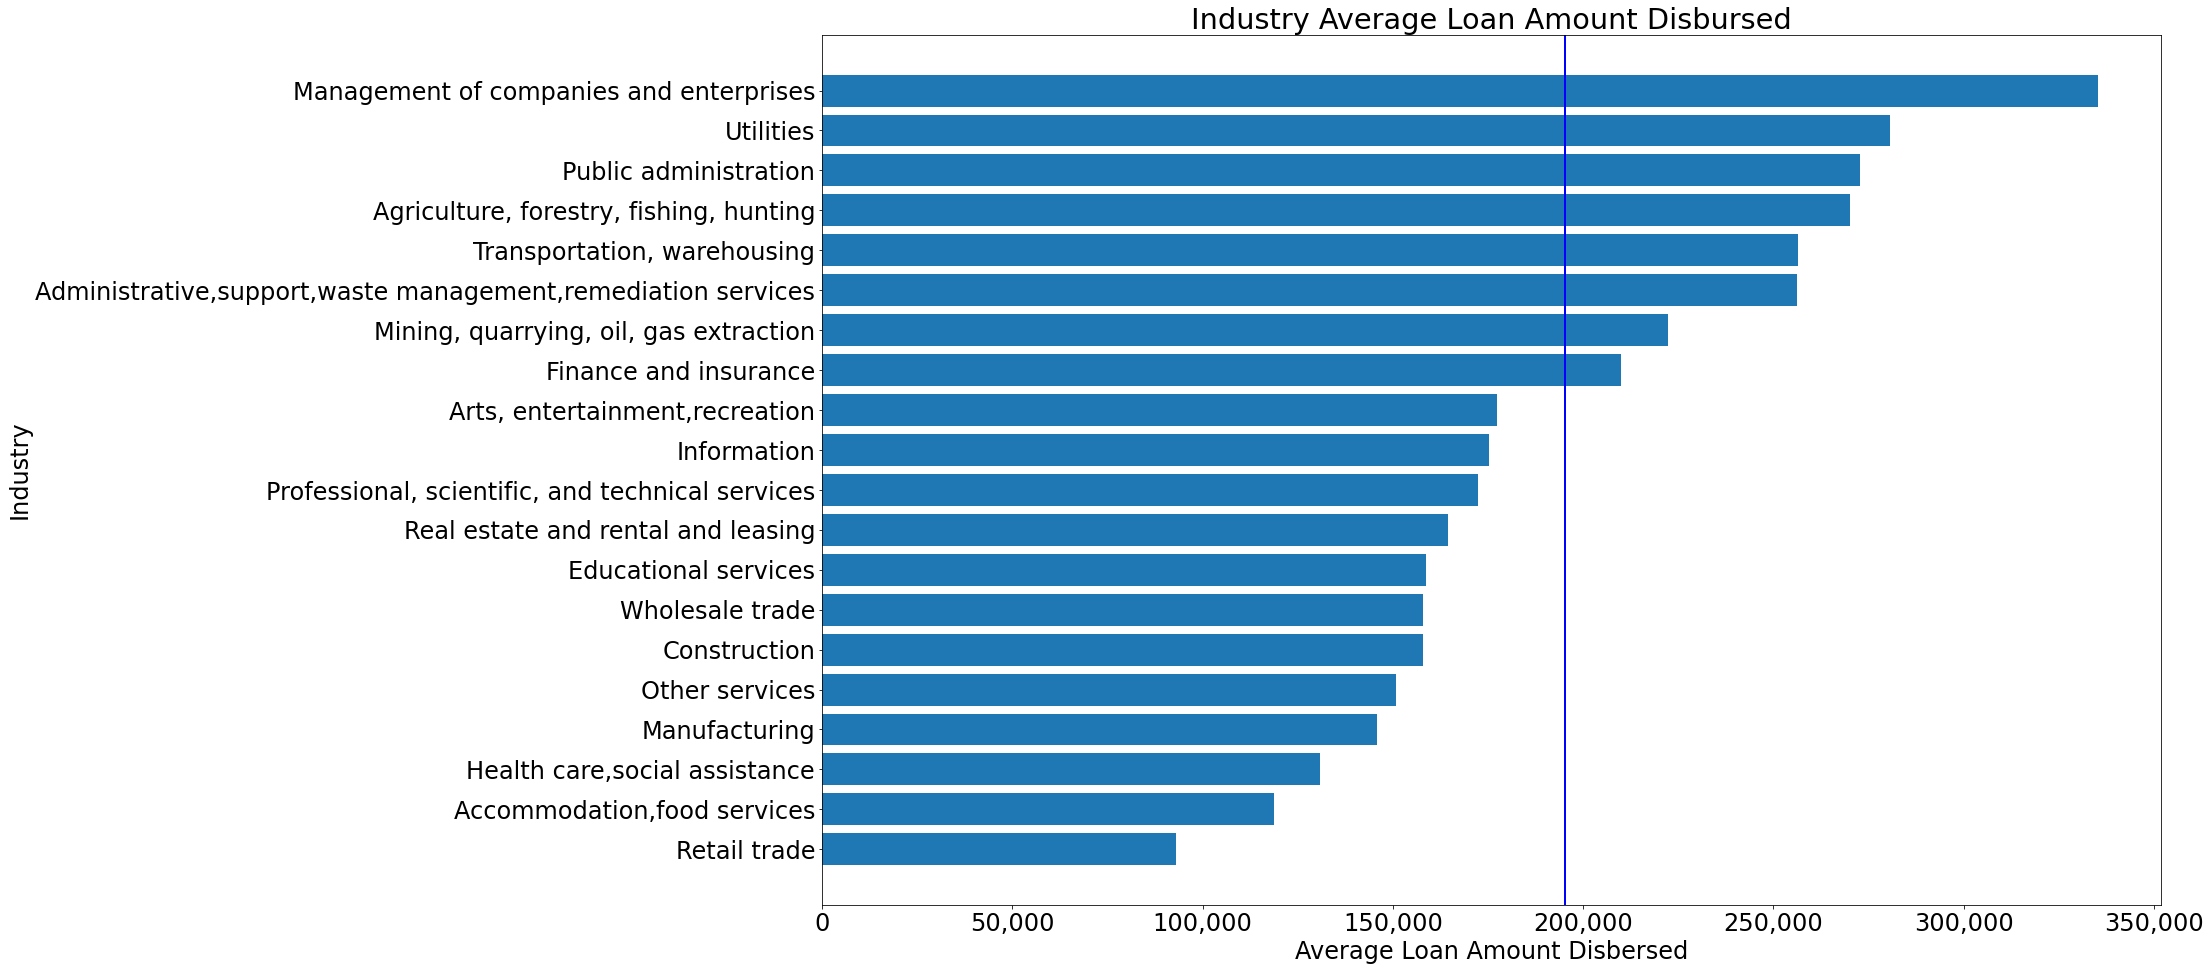

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)

industry = df['industry'].unique()
dispersed = df.groupby(by ='industry').mean()['amt_disb']
dispersed=dispersed.sort_values(axis=0, ascending=True)

plt.barh(industry, dispersed)

plt.ylabel('Industry')
plt.xlabel('Average Loan Amount Disbersed')
plt.title('Industry Average Loan Amount Disbursed')

ax.axvline(dispersed.mean(), color='blue', linewidth=2)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig('naics.png')
plt.show()

In [ ]:
#state
#bank
#is_new

In [ ]:
mean_amt = df['amt_disb'].mean()
mean_amt

194513.6619746071

In [ ]:
#lower half of loan disbursemnt 
lower_df = df[df['amt_disb'] <= mean_amt]
len(lower_df)

494559

In [ ]:
#upper half of loan disbursment 
upper_df = df[df['amt_disb'] > mean_amt]
len(upper_df)

190357

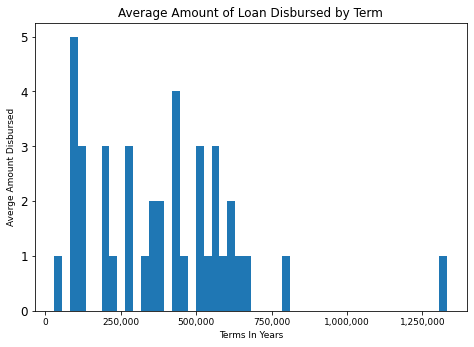

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# lower_df.drop(lower_df[lower_df['term'] > 25].index, inplace = True)

industry = df['term'].unique()
dispersed = df.groupby(by ='term').mean()['amt_disb']
# dispersed=dispersed.sort_values(axis=0, ascending=True)

ax.hist(dispersed, bins=50)

plt.xticks(fontsize=9) 
plt.yticks(fontsize=12)
ax.figsize=(16,16)

ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylabel('Averge Amount Disbursed', fontsize=9,)
plt.xlabel('Terms In Years', fontsize=9)
plt.title('Average Amount of Loan Disbursed by Term', fontsize=12)

plt.show()

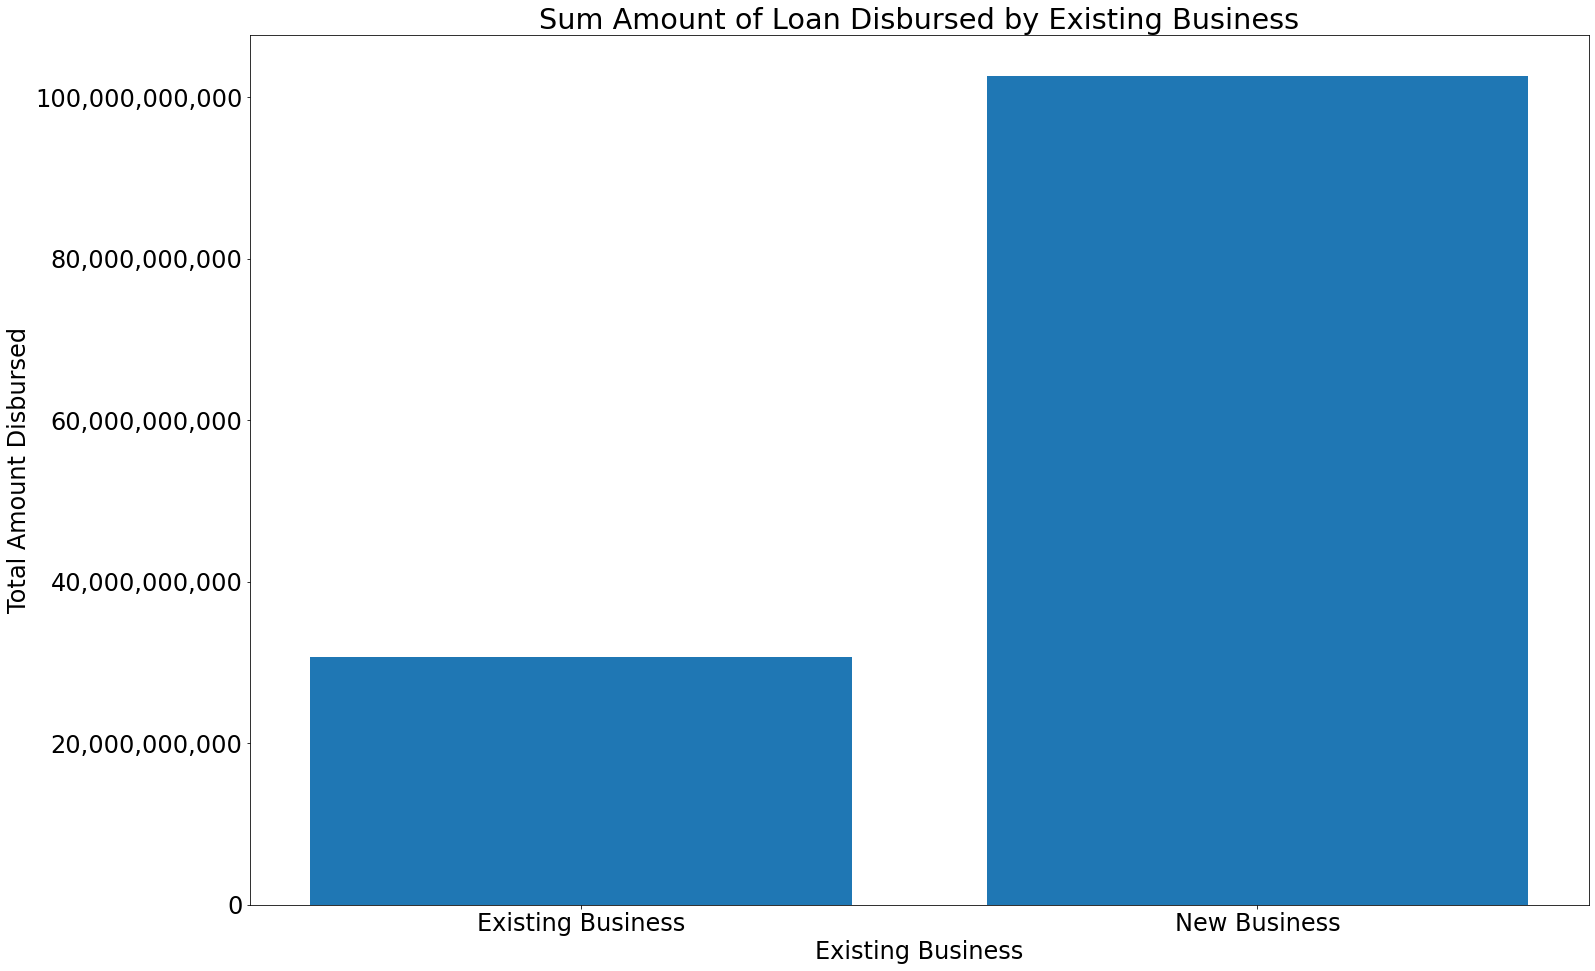

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)

# term_group = df.groupby('term').mean()
# term_group
# term_group = term_group.reset_index()
# termList = term_group['term']

plt.bar(df['is_new'].unique(),df.groupby('is_new').sum()['amt_disb'])
len(df['term'].unique())
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# ax.axhline(df['amt_disb'].mean(), color='blue', linewidth=2)
plt.xticks([0,1],['Existing Business','New Business'])
plt.ylabel('Total Amount Disbursed')
plt.xlabel('Existing Business')
plt.title('Sum Amount of Loan Disbursed by Existing Business')

plt.show()

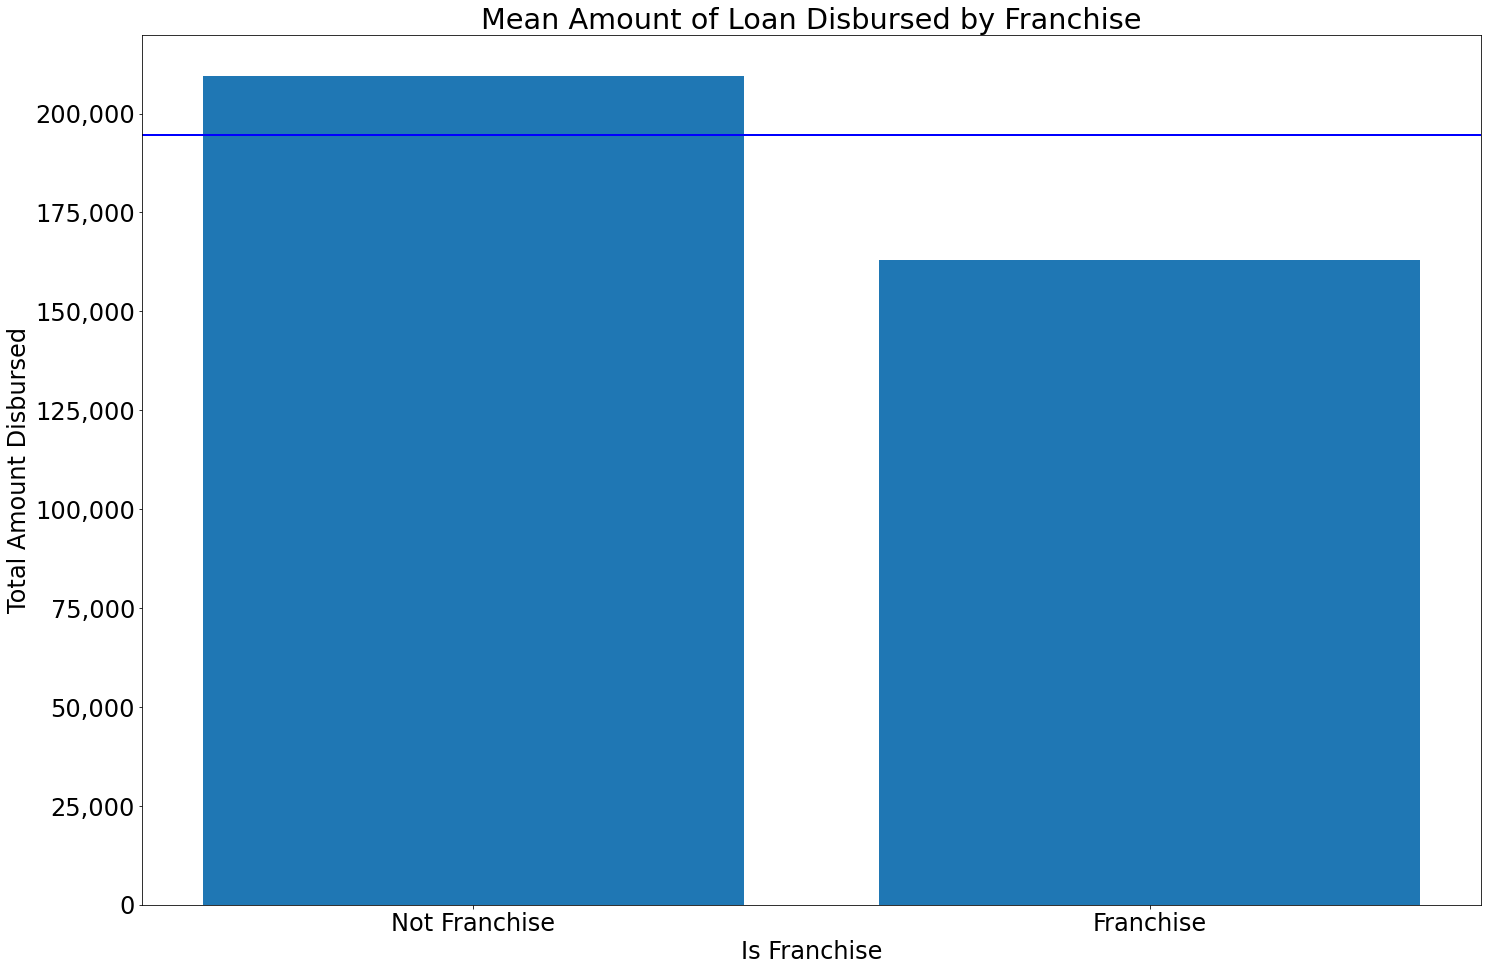

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)

# term_group = df.groupby('term').mean()
# term_group
# term_group = term_group.reset_index()
# termList = term_group['term']

plt.bar(df['franch'].unique(),df.groupby('franch').mean()['amt_disb'])
len(df['term'].unique())
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.axhline(df['amt_disb'].mean(), color='blue', linewidth=2)
plt.xticks([0,1],['Not Franchise','Franchise'])
plt.ylabel('Total Amount Disbursed')
plt.xlabel('Is Franchise')
plt.title('Mean Amount of Loan Disbursed by Franchise')

plt.show()

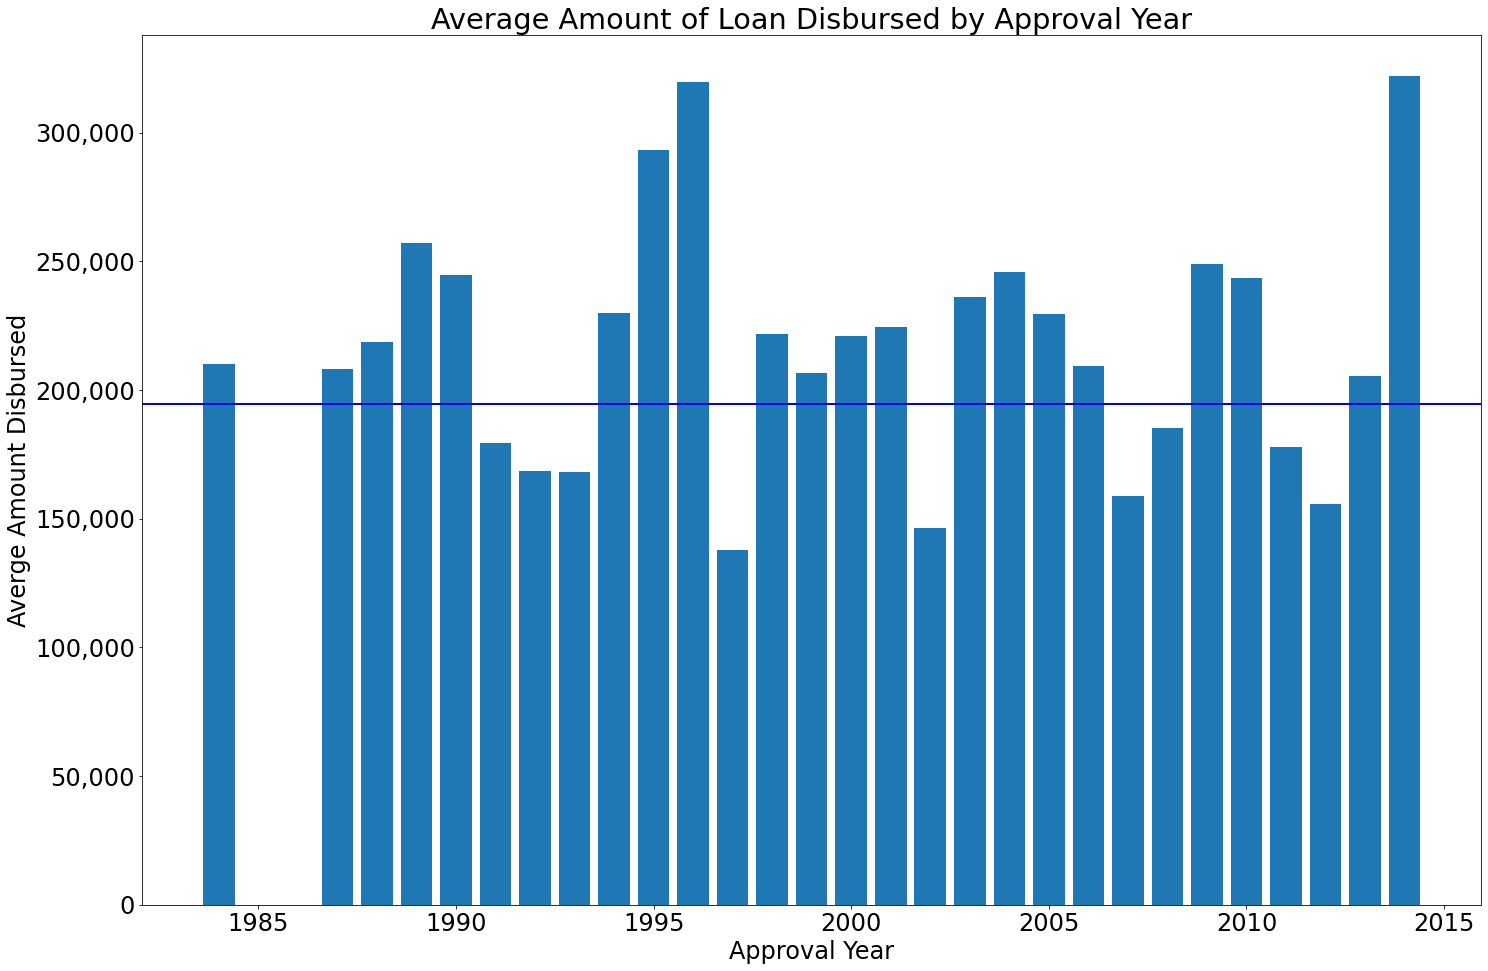

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)

# term_group = df.groupby('term').mean()
# term_group
# term_group = term_group.reset_index()
# termList = term_group['term']

plt.bar(df['appv_fy'].unique(),df.groupby('appv_fy').mean()['amt_disb'])
len(df['term'].unique())
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.axhline(df['amt_disb'].mean(), color='blue', linewidth=2)

plt.ylabel('Averge Amount Disbursed')
plt.xlabel('Approval Year')
plt.title('Average Amount of Loan Disbursed by Approval Year')

plt.show()

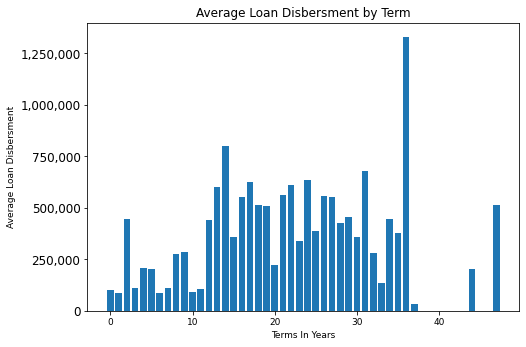

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# upper_df.drop(upper_df[upper_df['term'] > 35].index, inplace = True)
industry = df['term'].unique()
dispersed = df.groupby(by ='term').mean()['amt_disb']
# dispersed=dispersed.sort_values(axis=0, ascending=True)

ax.bar(industry,dispersed)

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.xticks(fontsize=9) 
plt.yticks(fontsize=12)
ax.figsize=(16,16)

plt.ylabel('Average Loan Disbersment', fontsize=9,)
plt.xlabel('Terms In Years', fontsize=9)
plt.title('Average Loan Disbersment by Term', fontsize=12)

plt.show()

In [ ]:
#is_new 
new_up = (upper_df['is_new']== True).sum()
notnew_up = (upper_df['is_new']== False).sum()
notnew = ((df['is_new']== False).sum()/len(df))
print(notnew)

0.7230127490086375


In [ ]:
new = ((df['is_new']== True).sum()/len(df))
print(new)

0.27698725099136245


In [ ]:

new_low = (lower_df['is_new'] == True).sum()
notnew_low = (lower_df['is_new'] == False).sum()

In [ ]:
print('Percentage of new businesses in upper half of loan disbursement:', (new_up)/len(upper_df))
print('Percentage of existing businesses in upper half of loan disbursement:', (notnew_up)/len(upper_df))

Percentage of new businesses in upper half of loan disbursement: 0.22065382413044962
Percentage of existing businesses in upper half of loan disbursement: 0.7793461758695504


In [ ]:
print('Percentage of new businesses in lower half of loan disbursement:', (new_low)/len(lower_df))
print('Percentage of existing businesses in lower half of loan disbursement:', (notnew_low)/len(lower_df))

Percentage of new businesses in lower half of loan disbursement: 0.2986701283365584
Percentage of existing businesses in lower half of loan disbursement: 0.7013298716634415


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')

Text(0.5, 1.0, 'Exsisting Businesses in Upper Amount of Loan Disbursement')

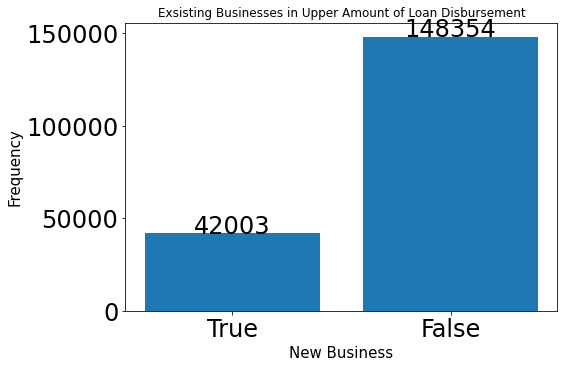

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

newornot = ['True','False']
is_new_count = [new_up, notnew_up]

plt.bar(newornot,is_new_count)
addlabels(newornot, is_new_count)

plt.figsize=(12,8)
plt.xlabel('New Business', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Exsisting Businesses in Upper Amount of Loan Disbursement', fontsize=12)


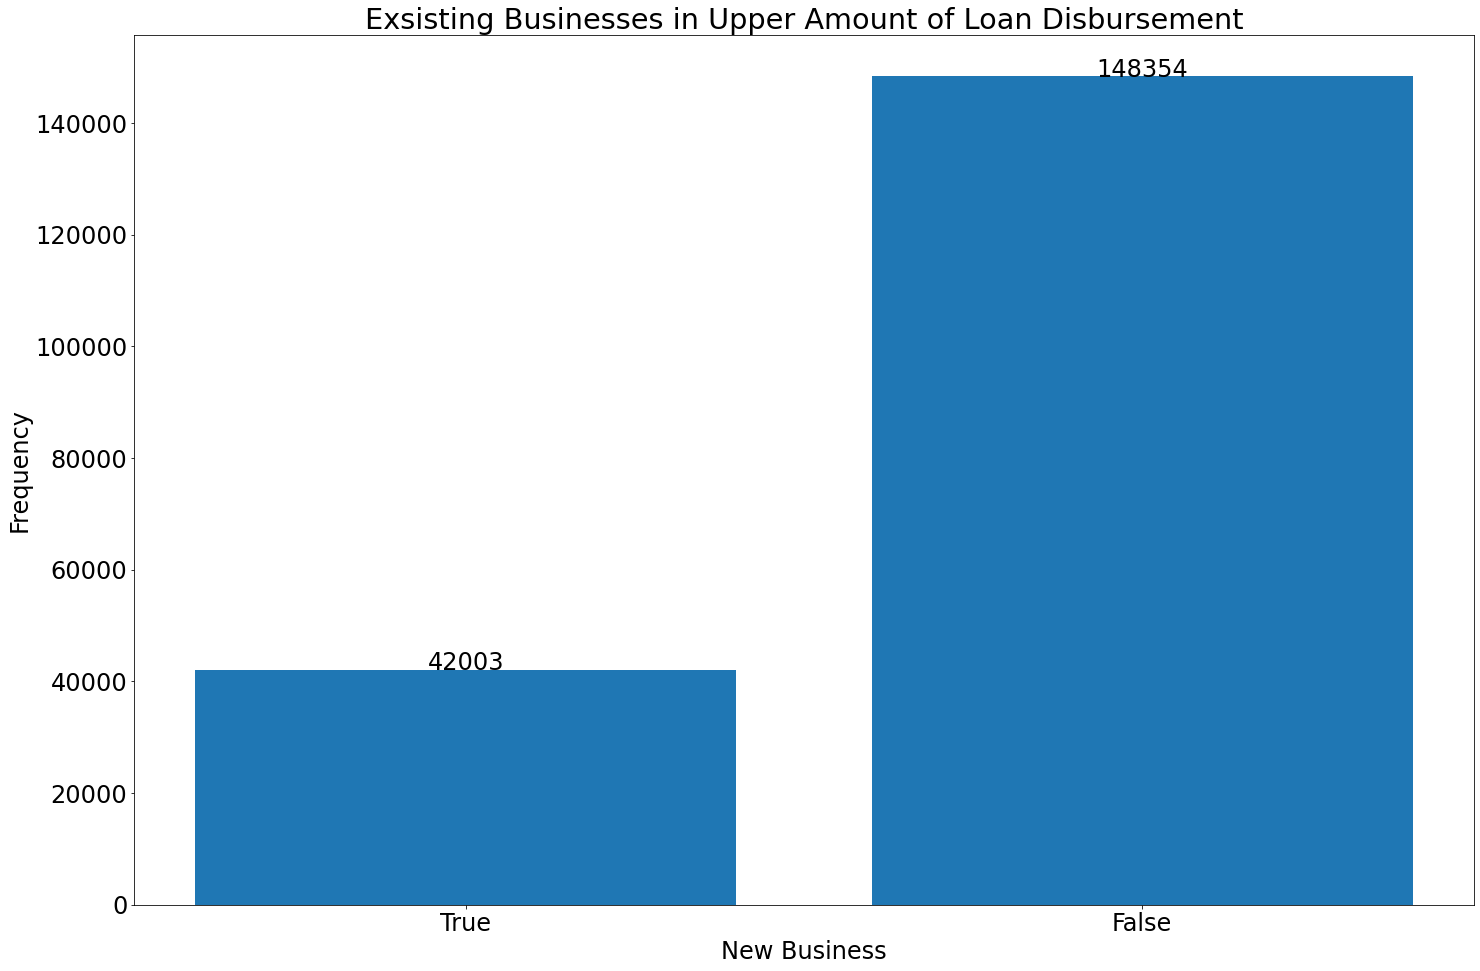

In [ ]:
fig, ax = plt.subplots(figsize=master_figsize)

newornot = ['True', 'False']
is_new_count = [new_up, notnew_up]

plt.bar(newornot, is_new_count)
addlabels(newornot, is_new_count)

plt.xlabel('New Business')
plt.ylabel('Frequency')
plt.title('Exsisting Businesses in Upper Amount of Loan Disbursement')
plt.show()

Text(0.5, 1.0, 'Exsisting Businesses in Lower Amount of Loan Disbursement')

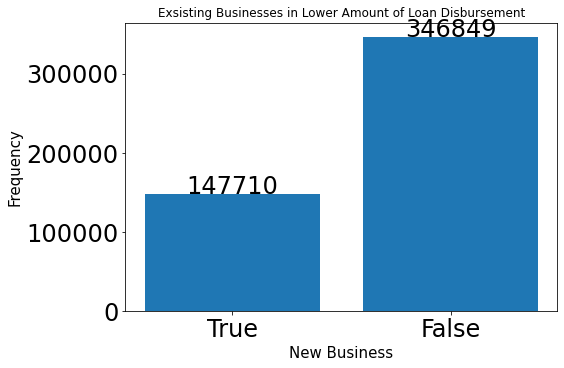

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

newornot = ['True','False']
is_new_count = [new_low, notnew_low]

plt.bar(newornot,is_new_count)
addlabels(newornot, is_new_count)

plt.figsize=(12,8)
plt.xlabel('New Business', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Exsisting Businesses in Lower Amount of Loan Disbursement', fontsize=12)

Text(0.5, 1.0, 'Exsisting Businesses in Lower Amount of Loan Disbursement')

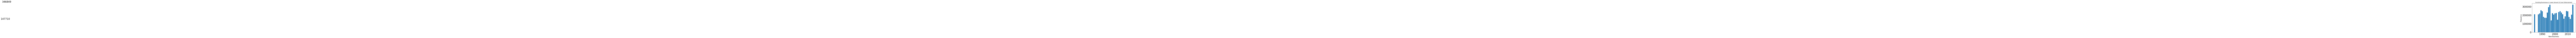

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

years = df['appv_fy'].unique()
amounts = df.groupby(['appv_fy']).mean()['amt_disb']

plt.bar(years,amounts)
addlabels(newornot, is_new_count)

plt.figsize=(12,8)
plt.xlabel('New Business', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Exsisting Businesses in Lower Amount of Loan Disbursement', fontsize=12)